## Feature engineering
- dummy/one-hot encoding doubled the amount of data and almost doubled number of columns - not good
- error margins were significant with dummies + linear regr
- instead, some feature engineering of categorical data.

## Domain awareness
- create new, smarter features from the raw categorical ones
- target Trip_Price:


1. Time - rush-hour or not (IsRushHour 1/0)? weekend vs weekday
2. Time - time of day (4 values) weighted differently
3. Weather - binary/numeric (IsRain == 1, otherwise 0 if it's not raining)
4. Traffic - IsTraffic binary. EDA indicates only high traffic has real bearing on trip price

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [63]:
# check if any rows have high number of missing values
# as above - Trip_Price is missing in 49 rows...
# First: drop any rows missing Trip_Price since that is Target
df["Trip_Price"].isnull().sum()

np.int64(49)

In [64]:
# drop entire row where Trip_Price is missing
df_trip_price = df.dropna(subset=["Trip_Price"])
df_trip_price

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [65]:
df_trip_price["Trip_Price"].isnull().sum()

np.int64(0)

In [66]:
df_trip_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [67]:
# decide that out of 11 columns, if a row is missing more than 3-4 values, then drop it
df[df.isnull().sum(axis=1) >= 3]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
19,15.27,Morning,NaN,NaN,Low,Clear,3.93,0.73,0.12,NaN,27.3543
107,38.02,Evening,NaN,4.0,NaN,Clear,NaN,1.31,0.35,33.73,66.2817
125,21.93,Afternoon,NaN,3.0,Low,NaN,4.53,0.76,NaN,74.52,48.0240
137,NaN,NaN,NaN,3.0,Low,Clear,4.52,1.38,0.35,57.56,73.5870
173,12.10,Morning,Weekend,NaN,Low,Clear,NaN,0.59,0.31,NaN,19.2643
177,19.95,Morning,Weekday,3.0,Low,NaN,2.50,0.88,0.49,NaN,NaN
262,7.86,Afternoon,NaN,3.0,Medium,Rain,4.82,0.75,0.26,NaN,NaN
344,NaN,Evening,NaN,NaN,Low,Clear,4.62,1.86,0.43,7.19,45.8975
583,17.11,Afternoon,Weekday,NaN,Medium,NaN,2.77,1.23,NaN,91.82,36.6701
631,44.87,Afternoon,NaN,4.0,Low,Clear,4.27,NaN,0.34,90.81,NaN


In [68]:
# check missing data status in rows after Trip_Price is dropped
# only 9 rows are missing >=3 value counts, so drop these
df_trip_price[df_trip_price.isnull().sum(axis=1) >= 3]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
19,15.27,Morning,NaN,NaN,Low,Clear,3.93,0.73,0.12,NaN,27.3543
107,38.02,Evening,NaN,4.0,NaN,Clear,NaN,1.31,0.35,33.73,66.2817
125,21.93,Afternoon,NaN,3.0,Low,NaN,4.53,0.76,NaN,74.52,48.0240
137,NaN,NaN,NaN,3.0,Low,Clear,4.52,1.38,0.35,57.56,73.5870
173,12.10,Morning,Weekend,NaN,Low,Clear,NaN,0.59,0.31,NaN,19.2643
344,NaN,Evening,NaN,NaN,Low,Clear,4.62,1.86,0.43,7.19,45.8975
583,17.11,Afternoon,Weekday,NaN,Medium,NaN,2.77,1.23,NaN,91.82,36.6701
796,NaN,Evening,Weekday,NaN,NaN,Clear,3.05,0.74,0.35,105.71,74.5843
966,36.23,Morning,Weekend,4.0,NaN,Rain,3.61,NaN,0.27,NaN,97.1094


In [71]:
# drop rows with >=3 missing values
df_clean = df_trip_price[df_trip_price.isnull().sum(axis=1) < 3]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       895 non-null    float64
 1   Time_of_Day            894 non-null    object 
 2   Day_of_Week            901 non-null    object 
 3   Passenger_Count        899 non-null    float64
 4   Traffic_Conditions     895 non-null    object 
 5   Weather                898 non-null    object 
 6   Base_Fare              900 non-null    float64
 7   Per_Km_Rate            899 non-null    float64
 8   Per_Minute_Rate        895 non-null    float64
 9   Trip_Duration_Minutes  899 non-null    float64
 10  Trip_Price             942 non-null    float64
dtypes: float64(7), object(4)
memory usage: 88.3+ KB


In [72]:
# start checking for outliers in cleaned dataset
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,895.0,27.216122,20.203323,1.2300,12.625000,25.9200,38.720000,146.067047
Passenger_Count,899.0,2.474972,1.100813,1.0000,2.000000,2.0000,3.000000,4.000000
Base_Fare,900.0,3.494267,0.867337,2.0100,2.730000,3.5100,4.222500,5.000000
Per_Km_Rate,899.0,1.231313,0.429868,0.5000,0.855000,1.2200,1.610000,2.000000
Per_Minute_Rate,895.0,0.293765,0.115570,0.1000,0.190000,0.2900,0.390000,0.500000
Trip_Duration_Minutes,899.0,62.046073,32.312764,5.0100,35.610000,61.5700,89.180000,119.840000
Trip_Price,942.0,56.899296,40.594936,6.1269,33.739425,50.0962,68.994025,332.043689


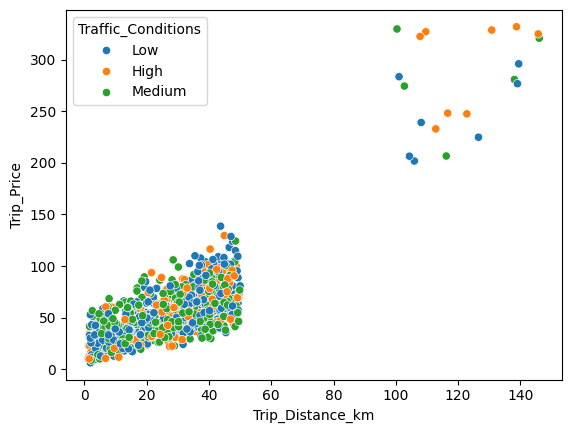

In [73]:
# check for outliers that might disturb/throw off prediction
# Distance vs Price with traffic_conditions
sns.scatterplot(data=df_clean, x="Trip_Distance_km", y="Trip_Price", hue="Traffic_Conditions")
plt.show()

# anytime distance is +100km (or 60km really)

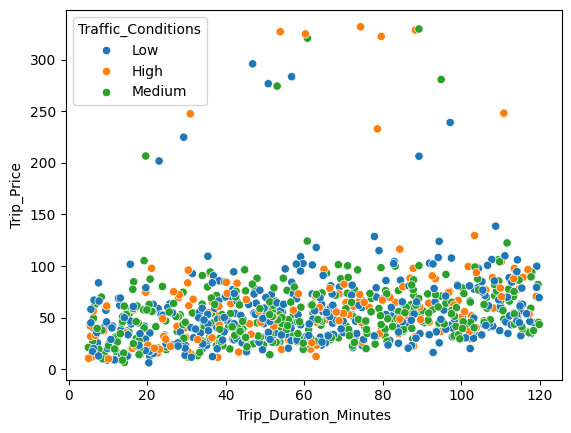

In [74]:
# Durations vs Price with traffic_conditions
sns.scatterplot(data=df_clean, x="Trip_Duration_Minutes", y="Trip_Price", hue="Traffic_Conditions")
plt.show()

# anytime price is above 150 is an outlier irrespective of traffic conditions

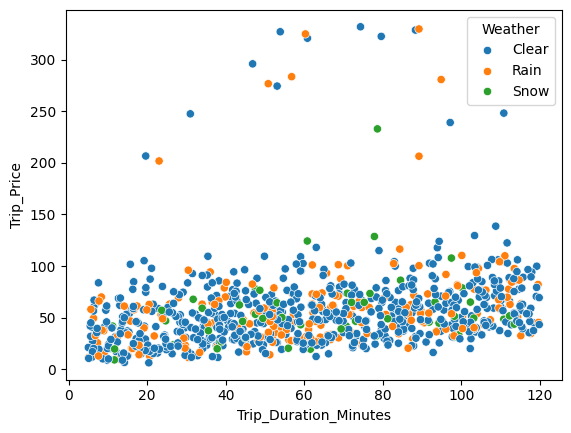

In [75]:
# Durations vs Price with weather
sns.scatterplot(data=df_clean, x="Trip_Duration_Minutes", y="Trip_Price", hue="Weather")
plt.show()

### Drop outliers from dataset:
1. price >= 150
2. distance >= 60

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       895 non-null    float64
 1   Time_of_Day            894 non-null    object 
 2   Day_of_Week            901 non-null    object 
 3   Passenger_Count        899 non-null    float64
 4   Traffic_Conditions     895 non-null    object 
 5   Weather                898 non-null    object 
 6   Base_Fare              900 non-null    float64
 7   Per_Km_Rate            899 non-null    float64
 8   Per_Minute_Rate        895 non-null    float64
 9   Trip_Duration_Minutes  899 non-null    float64
 10  Trip_Price             942 non-null    float64
dtypes: float64(7), object(4)
memory usage: 88.3+ KB


In [79]:
df_cleaned = df_clean[
    (df_clean["Trip_Price"] <150) &
    (df_clean["Trip_Distance_km"] < 60)
]
df_cleaned

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [80]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       875 non-null    float64
 1   Time_of_Day            830 non-null    object 
 2   Day_of_Week            836 non-null    object 
 3   Passenger_Count        835 non-null    float64
 4   Traffic_Conditions     829 non-null    object 
 5   Weather                834 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  835 non-null    float64
 10  Trip_Price             875 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.0+ KB


In [90]:
# fill in missing values accordingly
# - mean/median for numerical values and mode for most common
# - 'Unknown' for categorical values (or 'mode' for most common category..?)

df_filled = df_cleaned.copy()
# Numerical fills:
cols_to_fill_mean = ["Base_Fare", "Per_Km_Rate", "Per_Minute_Rate"]
df_filled[cols_to_fill_mean] = df_filled[cols_to_fill_mean].fillna(df_filled[cols_to_fill_mean].mean())

cols_to_fill_median = ["Trip_Distance_km", "Trip_Duration_Minutes"]
df_filled[cols_to_fill_median] = df_filled[cols_to_fill_median].fillna(df_filled[cols_to_fill_median].median())

cols_to_fill_mode = ["Passenger_Count"]
df_filled[cols_to_fill_mode] = df_filled[cols_to_fill_mode].fillna(df_filled[cols_to_fill_mode].mode().iloc[0])

In [91]:
# Categorical fills:
cols_to_fill_unknown = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]
df_filled[cols_to_fill_unknown] = df_filled[cols_to_fill_unknown].fillna("Unknown")

In [93]:
df_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,875.0,25.080354,14.407212,1.2300,12.1850,25.420000,37.7650,49.9900
Passenger_Count,875.0,2.509714,1.078534,1.0000,2.0000,3.000000,3.0000,4.0000
Base_Fare,875.0,3.508801,0.850585,2.0100,2.7600,3.508801,4.2100,5.0000
Per_Km_Rate,875.0,1.236359,0.422028,0.5000,0.8700,1.236359,1.5900,2.0000
Per_Minute_Rate,875.0,0.292647,0.113062,0.1000,0.2000,0.292647,0.3900,0.5000
Trip_Duration_Minutes,875.0,62.101600,31.705361,5.0100,36.5650,61.960000,87.9350,119.8400
Trip_Price,875.0,52.295256,24.137835,6.1269,33.4263,49.187100,67.0695,138.6425


## Encoding categorical values into smart targets
- 